In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame
import json
import csv

In [2]:
# import dataset as pandas.DataFrame
data = pd.read_csv('a.tsv', sep='\t', header=0, names=['Person', 'Date', 'Input', 'Result'])

In [3]:
data

,Person,Date,Input,Result
0,1,2014-09-15,"[{""meal"": ""MY food"", ""dishes"": [{""nutritions"":...","{""total"": [{""name"": ""Calories"", ""value"": 2430}..."
1,1,2014-09-16,"[{""meal"": ""MY food"", ""dishes"": [{""nutritions"":...","{""total"": [{""name"": ""Calories"", ""value"": 1862}..."
2,1,2014-09-17,"[{""meal"": ""MY food"", ""dishes"": [{""nutritions"":...","{""total"": [{""name"": ""Calories"", ""value"": 2251}..."
3,1,2014-09-18,"[{""meal"": ""MY food"", ""dishes"": [{""nutritions"":...","{""total"": [{""name"": ""Calories"", ""value"": 2001}..."
4,1,2014-09-19,"[{""meal"": ""MY food"", ""dishes"": [{""nutritions"":...","{""total"": [{""name"": ""Calories"", ""value"": 2158}..."
...,...,...,...,...
587181,9897,2015-03-02,"[{""meal"": ""Breakfast"", ""dishes"": [{""nutritions...","{""total"": [{""name"": ""Calories"", ""value"": 1979}..."
587182,9897,2015-03-03,"[{""meal"": ""Breakfast"", ""dishes"": [{""nutritions...","{""total"": [{""name"": ""Calories"", ""value"": 2141}..."
587183,9897,2015-03-04,"[{""meal"": ""Breakfast"", ""dishes"": [{""nutritions...","{""total"": [{""name"": ""Calories"", ""value"": 543},..."
587184,9897,2015-03-14,"[{""meal"": ""Breakfast"", ""dishes"": [{""nutritions...","{""total"": [{""name"": ""Calories"", ""value"": 2024}..."


In [4]:
def get_value(data, row, col, jsn):
    if jsn:
        return json.loads(data.iloc[row, col])
    else:
        return data.iloc[row, col]

In [23]:
def get_dishes(data, row):
    dishes = get_value(data, row, 2, True)[0]['dishes']
    res = []
    for dish in dishes:
        res.append(dish['name'])
    return res

In [32]:
def get_dishes_size(data, row):
    return len(get_value(data, row, 2, True)[0]['dishes'])

In [37]:
def get_total_calories(data, row):
    value = get_value(data, row, 3, True)
    return value['total'][0]['value']

In [38]:
def get_total_carbs(data, row):
    value = get_value(data, row, 3, True)
    return value['total'][1]['value']

In [41]:
def get_total_fat(data, row):
    value = get_value(data, row, 3, True)
    return value['total'][2]['value']

In [42]:
def get_total_protein(data, row):
    value = get_value(data, row, 3, True)
    return value['total'][3]['value']

In [43]:
def get_total_sodium(data, row):
    value = get_value(data, row, 3, True)
    return value['total'][4]['value']

In [50]:
def get_total_sugar(data, row):
    value = get_value(data, row, 3, True)
    return value['total'][5]['value']

In [39]:
def get_goal_carbs(data, row):
    value = get_value(data, row, 3, True)
    return value['goal'][1]['value']

In [40]:
def get_goal_calories(data, row):
    value = get_value(data, row, 3, True)
    return value['goal'][0]['value']

In [45]:
def get_goal_fat(data, row):
    value = get_value(data, row, 3, True)
    return value['goal'][2]['value']

In [47]:
def get_goal_protein(data, row):
    value = get_value(data, row, 3, True)
    return value['goal'][3]['value']

In [48]:
def get_goal_sodium(data, row):
    value = get_value(data, row, 3, True)
    return value['goal'][4]['value']

In [49]:
def get_goal_sugar(data, row):
    value = get_value(data, row, 3, True)
    return value['goal'][5]['value']

In [69]:
def num_days_for_person(data, person):
    mask = data.Person == person
    return data.Person.loc[mask].shape[0]

In [74]:
def num_persons_for_date(data, date):
    mask = data.Date == date
    return data.Date.loc[mask].shape[0]

In [84]:
def increase_y_by_range(y, num):
    if num <= 50 and num != 0:
        y[0]+=1
    elif num <= 100:
        y[1]+=1
    elif num <= 150:
        y[2]+=1
    elif num <= 200:
        y[3]+=1

In [8]:
data.nunique(axis=0, dropna=False)

Person      9896
Date         208
Input     578774
Result    581728
dtype: int64

In [85]:
y = [0,0,0,0]
unique_people = data.iloc[:, 0].unique()
for person in unique_people:
    increase_y_by_range(y, data.loc[data.Person == person, ['Person']].shape[0])

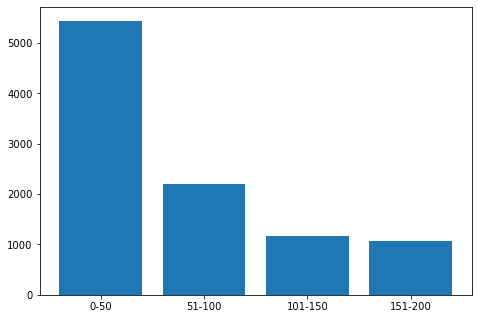

In [87]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ranges = ['0-50', '51-100', '101-150', '151-200']
ax.bar(ranges,y)
plt.show()

In [88]:
unique_dates = data.iloc[:, 1].unique()
date_people = {}
sm = 0
for date in unique_dates:
    mask = data.Date == date
    sz = data.loc[mask, :].shape[0]
    date_people[date] = sz
    sm += sz
print(sm)

587186


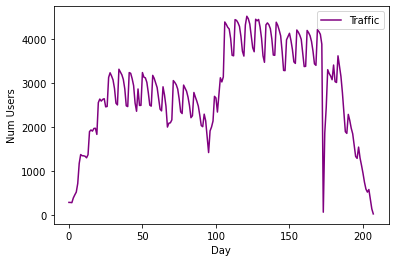

In [89]:
plt.plot([i for i in range(0,208)], list(date_people.values()), color='purple', label='Traffic')
plt.ylabel('Num Users')
plt.xlabel('Day')
plt.legend()
plt.show()

In [90]:
unique_dates.sort()
dates = []
for date in unique_dates:
    dates.append(int(date[len(date) - 2:]))
missing = 0
for i in range(1, len(dates)):
    if dates[i - 1] > dates[i]:
        if dates[i] != 1:
            missing += 1
missing

0